[(33344, 28625), (28372, 37328), (26601, 31913), (20536, 9134), (19695, 1777), (15180, 2267), (12584, 7931), (9918, 61142), (8903, 20420), (8619, 53346)]


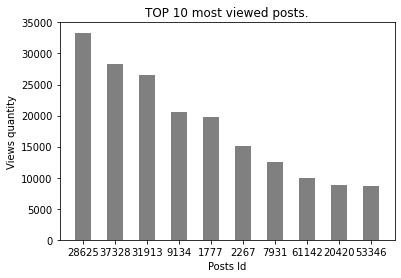

[(33344, 28625), (28372, 37328), (26601, 31913), (20536, 9134), (19695, 1777), (15180, 2267), (12584, 7931), (9918, 61142), (8903, 20420), (8619, 53346)]


In [7]:
# TOP 10 most viewed posts.

from xml.etree.cElementTree import ElementTree as ET
from functools import reduce
from typing import Counter
import re
import os
import operator
import csv

def chunkify(iterable,len_of_chunk):
    for i in range(0,len(iterable),len_of_chunk):
        yield iterable[i:i + len_of_chunk]

def get_title_and_views(data):
    id=data.attrib['Id'] #NO BORRAR
    views=data.attrib['ViewCount']
    return views, id,  

def mapeado(data):    
    post_mapeados= list(map(get_title_and_views, data))
    return post_mapeados

def order_data(post_mapeado):
    #ordered_data=post_mapeado.sort(key=operator.itemgetter(1))
    int_tuple=tuple(tuple(map(int, x)) for x in post_mapeado)
    ordered_data=sorted(int_tuple, key=operator.itemgetter(0), reverse=True) # poner 0 en el parentesis 
    return ordered_data                                                      # si vuelvo a poner la ID
                                                                             # mas arriba

def max_value(top_10_post):
    return max(top_10_post)

def unify_chunks(data1,data2):
    for tupla in data2:
        data1.append(tupla)
    return data1

#current directory(notebooks)
current_folder=os.path.dirname(os.path.realpath(''))
#previous directory(bigdata)
bigdata_path=os.path.abspath(os.path.join(current_folder, os.pardir))
#datasets path
datasets_path=bigdata_path+'/bigdata/datasets'
tree=ET()
tree.parse(f'{datasets_path}/posts.xml')
root=tree.getroot()
data_chunks=chunkify(root,50)
post_mapeado=list(map(mapeado,data_chunks))

def set_int_tuple(unify_list):
    lista_aux =[]
    for dato in unify_list:
        lista_aux.append((int(dato[0]),int(dato[1])))
    return lista_aux

unify_list=(reduce(unify_chunks,post_mapeado))

int_list=set_int_tuple(unify_list)

def order_list(int_list):
    ordered_list=sorted(int_list, key=operator.itemgetter(0), reverse=True)
    return ordered_list

ordered_list=order_list(int_list)

top_10=(ordered_list[0:10])

print(top_10)

output=zip(top_10)
output_path=bigdata_path+'/bigdata/outputs/'

with open(f'{output_path}GG_top_10_most_viewed_posts.csv','w',newline='') as file:
    csv_out=csv.writer(file)
    csv_out.writerow(['Post_views','Post_id'])
    for row in top_10:
        csv_out.writerow(row)

import matplotlib.pyplot as plt

height=[item0[0] for item0 in top_10]
tick_label=[item1[1] for item1 in top_10]

left=[1,2,3,4,5,6,7,8,9,10]

plt.bar(x=left,height=height,tick_label=tick_label,width=0.5,color=['grey'])
plt.xlabel('Posts Id')
plt.ylabel('Views quantity')
plt.title('TOP 10 most viewed posts.')
plt.show()

print(top_10)

In [15]:
# Average response time for top 200-300 most scored posts.

from xml.etree.cElementTree import ElementTree as ET
from functools import reduce
from typing import Counter
import os
import operator
from datetime import datetime, timedelta
import pandas as pd

def chunkify(iterable,len_of_chunk):
    for i in range(0,len(iterable),len_of_chunk):
        yield iterable[i:i + len_of_chunk]

#current directory(notebooks)
current_folder=os.path.dirname(os.path.realpath(''))
#previous directory(bigdata)
bigdata_path=os.path.abspath(os.path.join(current_folder, os.pardir))
#datasets path
datasets_path=bigdata_path+'/bigdata/datasets/'

tree=ET()
tree.parse(f'{datasets_path}/posts.xml')
root=tree.getroot()
data_chunks1=chunkify(root,50)
data_chunks2=chunkify(root,50)

date_format='%Y-%m-%dT%H:%M:%S.%f'

def question_posts(data):
    score=data.attrib['Score']
    int_score=int(score)
    post_id=data.attrib['Id']
    post_type_id=int(data.attrib['PostTypeId'])
    creation_date=data.attrib['CreationDate']
    try:
        accepted_answ_id=data.attrib['AcceptedAnswerId']
    except:
        return
    return  accepted_answ_id,int_score,post_id,creation_date,post_type_id

def answer_posts(data):
    post_id=data.attrib['Id']
    post_type_id=int(data.attrib['PostTypeId'])
    creation_date=data.attrib['CreationDate']
    return  post_id,creation_date,post_type_id

def prueba(data):
    if data[4]=='1':
        return data[4]
    else:
        return

def mapeado_question(data):    
    post_mapeados= list(map(question_posts, data))
    post_mapeados=list(filter(None,post_mapeados))
    post_mapeados=list(filter(lambda x:x[4]==1,post_mapeados))
    return list(post_mapeados)

def mapeado_answer(data):    
    answer_mapeado= list(map(answer_posts, data))
    answer_mapeado=filter(None,answer_mapeado)
    answer_mapeado=list(filter(lambda x:x[2]==2,answer_mapeado))
    return list(answer_mapeado)

question_mapped=list(map(mapeado_question,data_chunks1))
answer_mapped=list(map(mapeado_answer,data_chunks2))

def unify(data1,data2):
    for tupla in data2:
        data1.append(tupla)
    return data1

question_unified=reduce(unify,question_mapped)
answer_unified=reduce(unify,answer_mapped)

def merged(question,answer):
    id = operator.itemgetter(0)
    answ_info = {id(post_id): post_id[1:] for post_id in answer}
    merged = [quest_id + answ_info[id(quest_id)] for quest_id in question if id(quest_id) in answ_info]
    return merged

merged_list=merged(question_unified,answer_unified)

def order_list(data):
    ordered_list=sorted(data, key=operator.itemgetter(1), reverse=True)
    return ordered_list

ordered_merged_list=order_list(merged_list)
top_200_300_first=ordered_merged_list[200:300]

question_dates_string=[x[3] for x in top_200_300_first]

def set_date(data):
    lista_aux =[]
    for dato in data:
        correct_Date=datetime.strptime(dato,date_format)
        lista_aux.append(correct_Date)
    return lista_aux

answer_dates_string=[x[5] for x in top_200_300_first]

question_dates = [datetime.strptime(date, date_format) for date in question_dates_string]

answer_dates=[datetime.strptime(date, date_format) for date in answer_dates_string]

operator_dif=list(map(operator.sub,answer_dates,question_dates))

quest=list(pd.to_datetime(question_dates_string))
answ=list(pd.to_datetime(answer_dates_string))

pandas_dif=list(map(operator.sub,answ,quest))


total_hours=(sum(operator_dif,timedelta()))
total_seconds=(total_hours.total_seconds())
average_response_time_in_hours=(total_seconds/100)/3600

print('Average response time:',average_response_time_in_hours,' hours')

output=f'Average response time: {average_response_time_in_hours} hours.'
output_path=bigdata_path+'/bigdata/outputs/'

with open(f'{output_path}GG_200_300_scored_avg_resp_time.csv','w') as file:
    file.write(str(output))

Average response time: 570.0695977916666  hours


In [18]:
# TOP 10 most mentioned words per tag.

from xml.etree.cElementTree import ElementTree as ET
from functools import reduce
from typing import Counter
import re
import os

from numpy import dtype

def chunkify(iterable,len_of_chunk):
    for i in range(0,len(iterable),len_of_chunk):
        yield iterable[i:i + len_of_chunk]

def get_tags_and_body(data):
    try:
        tags=data.attrib['Tags']
    except:
        return
    body=data.attrib['Body']
    body=re.sub('<[^<]+?>', '', body)
    tags=re.findall('<(.+?)>',tags)
    words_count=Counter(body.split())
    return tags, words_count

def separar_tags_y_palabras(data):
    return dict([tag, data[1].copy()]for tag in data[0])

def reducir_contadores(data1,data2):
    for key,value in data2.items():
        if key in data1.keys():
            data1[key].update(data2[key])
        else:
            data1.update({key: value})
    return data1

def mapeado(data_chunks):    
    post_mapeados= list(map(get_tags_and_body, data_chunks))
    cleaned_map=list(filter(None,post_mapeados))
    words_per_tag=list(map(separar_tags_y_palabras,cleaned_map))
    try:
        reduced_list=reduce(reducir_contadores,words_per_tag)
    except:
        return
    return reduced_list

def unify_chunks(data1,data2):
    for tupla in data2:
        data1.append(tupla)
    return data1

def calculate_top_10(data):
    return data[0], data[1].most_common(10)

#current directory(notebooks)
current_folder=os.path.dirname(os.path.realpath(''))
#previous directory(bigdata)
bigdata_path=os.path.abspath(os.path.join(current_folder, os.pardir))
#datasets path
datasets_path=bigdata_path+'/bigdata/datasets/'

tree=ET()
tree.parse(f'{datasets_path}/posts.xml')
root=tree.getroot()
data_chunks=chunkify(root,50)
mapped_list=list(map(mapeado,data_chunks))
mapped_list=list(filter(None,mapped_list))
reduced_list=reduce(reducir_contadores,mapped_list)
top_10=dict(map(calculate_top_10,reduced_list.items()))

output_path=bigdata_path+'/bigdata/outputs/'
int_to_str = lambda int_value: str(int_value)

with open(f'{output_path}GG_top_10_words_per_tag.csv','w',encoding='utf-8') as file:
    for key, values in top_10.items():
         for tuple_value in values:
             csv_row = [key] + list(map(int_to_str, list(tuple_value)))
             file.write(', '.join(csv_row)+'\n')

print(top_10)

{'discussion': [('the', 27310), ('to', 20967), ('a', 17073), ('I', 15332), ('of', 12150), ('and', 11316), ('is', 9643), ('that', 9314), ('it', 7218), ('in', 6631)], 'status-completed': [('the', 8031), ('to', 5006), ('a', 3833), ('I', 3776), ('and', 2426), ('is', 2283), ('of', 2280), ('that', 1933), ('on', 1839), ('in', 1831)], 'uservoice': [('a', 16), ('to', 16), ('the', 15), ('that', 14), ('I', 11), ('be', 10), ('and', 9), ('is', 8), ('of', 8), ('it', 8)], 'feature-request': [('the', 23198), ('to', 18175), ('a', 14061), ('I', 10489), ('of', 8699), ('and', 7748), ('that', 7373), ('be', 6808), ('is', 6655), ('it', 5692)], 'status-declined': [('the', 1864), ('to', 1312), ('a', 985), ('I', 850), ('of', 622), ('and', 576), ('is', 568), ('that', 545), ('it', 457), ('in', 452)], 'openid': [('I', 982), ('to', 827), ('the', 728), ('my', 467), ('and', 420), ('a', 348), ('in', 332), ('with', 284), ('is', 275), ('OpenID', 268)], 'login': [('I', 551), ('the', 476), ('to', 444), ('and', 231), ('a',